In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000','#0000FF'])
cmap_light = ListedColormap(['#FFBBBB','#BBBBFF'])

In [ ]:
# Step 1: Load the dataset
data = pd.read_csv("/content/Churn_Modelling - Churn_Modelling.csv")

In [ ]:
# Step 2: Data preprocessing
# Encode categorical variables
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})  # Encode Gender
data = pd.get_dummies(data, columns=['Geography'])  # One-hot encoding for Geography

# Select features and target variable
X = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
          'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender',
          'Geography_France', 'Geography_Germany', 'Geography_Spain']].values
y = data['Exited'].values.reshape(-1, 1)  # Reshape y for matrix operations

# Normalize features
X = X.astype(np.float64)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [ ]:
def sigmoid(h):
    return 1/(1+np.exp(-h))

def bin_cross_entropy(y,p_hat):
    return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [ ]:
class LogisticRegression():
    def __init__(self,thresh=0.5):
        self.thresh=thresh
        self.W = None
        self.b = None

    def fit(self,X,y,eta=1e-3,epochs=1e3,show_curve=True):
        epochs = int(epochs)
        N,D = X.shape

        #Initailize Weights and Biases
        self.W = np.random.randn(D)
        self.b = np.random.randn(1)
        J = np.zeros(epochs)

        #Stochastic Gradient Descent
        for epoch in range(epochs):
            p_hat = self.__forward__(X)
            J[epoch] = bin_cross_entropy(y,p_hat)

            #WeightUpdate Rules
            error = (p_hat - y.ravel())
            self.W -= eta*(1/N)*X.T@error
            self.b -= eta*(1/N)*np.sum(error)
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()

    def __forward__(self,X):
        return sigmoid(X@self.W+self.b)

    def predict(self,X):
        return (self.__forward__(X)>= self.thresh).astype(np.int32)

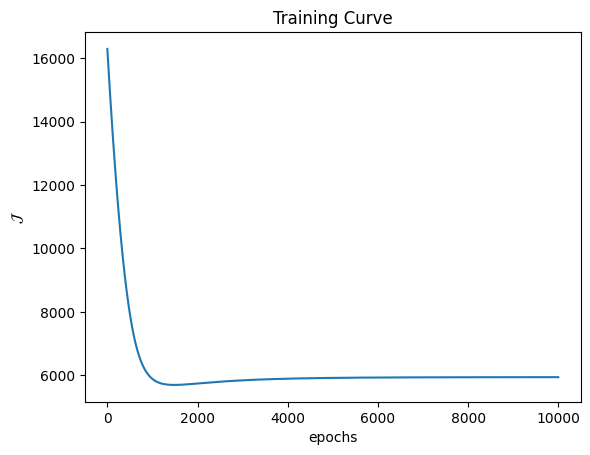

Training Accuracy: 0.7528
[-0.06457684  0.76219181 -0.04609227  0.16450587 -0.05903227 -0.02034948
 -0.53715938  0.02763329 -0.26304535 -0.35818206  0.02522075 -0.29403544] [-1.6530254]


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X,y, epochs =1e4, eta=1e-2, show_curve=True)
y_hat = log_reg.predict(X)
print(f"Training Accuracy: {accuracy(y,y_hat):0.4f}")
print(log_reg.W,log_reg.b)